# Sales Analysis

## Set up

Imports

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

/var/folders/67/w34t7wgn6_s13hb551pyr9vc0000gn/T/ipykernel_38728/3936878700.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Load the sales dataset

In [3]:
sales_df = pd.read_csv("retail_sales_dataset.csv")

Explore the dataset with Pandas

In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [4]:
sales_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


## Data Cleaning and Preprocessing

Convert the Date column to datetime

In [7]:
sales_df["Date"] = pd.to_datetime(sales_df["Date"])
sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Check for any missing values

In [9]:
sales_df.dropna(subset=["Customer ID"], inplace=True)
sales_df["Gender"].fillna(sales_df["Gender"].mode()[0], inplace=True)

/var/folders/67/w34t7wgn6_s13hb551pyr9vc0000gn/T/ipykernel_38728/2370912209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df["Gender"].fillna(sales_df["Gender"].mode()[0], inplace=True)


Standardize categorical data

In [13]:
sales_df["Gender"] = sales_df["Gender"].str.capitalize()
sales_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## EDA Insights

Total revenue per category

In [16]:
revenue_category = sales_df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)

Bar Plot: Revenue by category

/var/folders/67/w34t7wgn6_s13hb551pyr9vc0000gn/T/ipykernel_38728/1754207589.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=revenue_category.index, y=revenue_category.values, palette="viridis")


<AxesSubplot:xlabel='Product Category'>

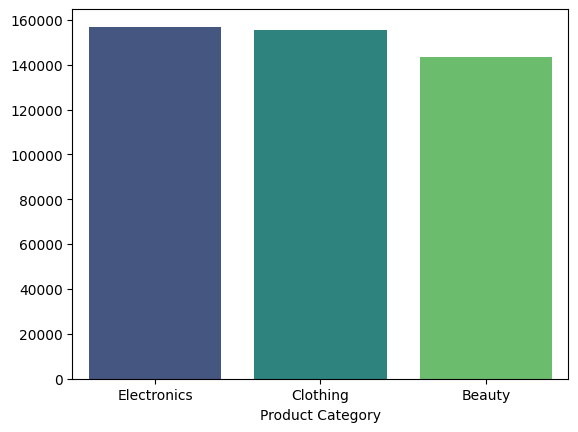

In [17]:
sns.barplot(x=revenue_category.index, y=revenue_category.values, palette="viridis")

Histogram: Age

<AxesSubplot:xlabel='Age', ylabel='Count'>

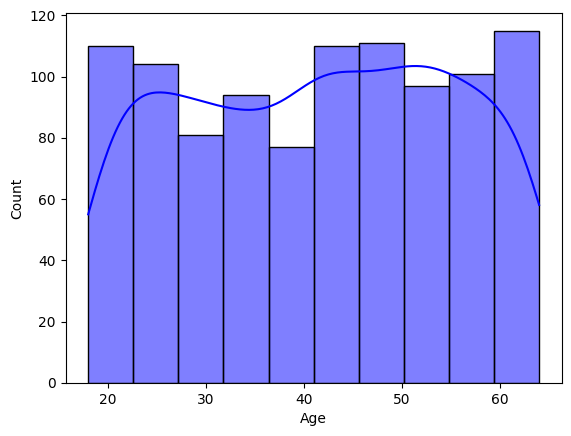

In [18]:
sns.histplot(sales_df["Age"], bins=10, kde=True, color="blue")

Box Plot: Spending by Age

<AxesSubplot:xlabel='Age', ylabel='Total Amount'>

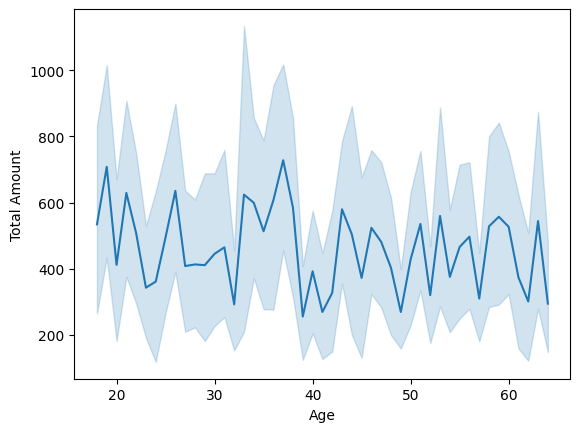

In [22]:
#sns.boxplot(x="Age", y="Total Amount", data=sales_df, palette='coolwarm')
sns.lineplot(x="Age", y="Total Amount", data=sales_df)

Line Plot: Monthly Sales Trend

<AxesSubplot:xlabel='Month'>

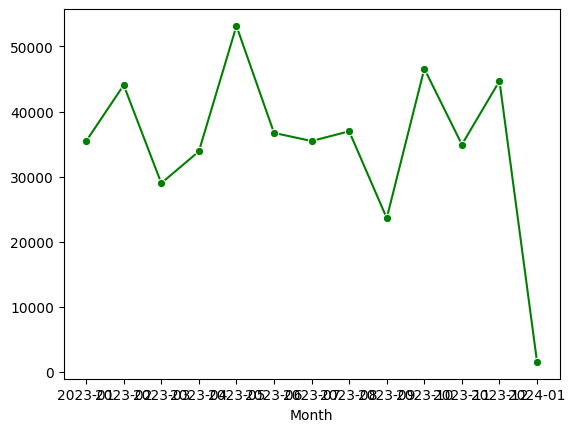

In [27]:
sales_df["Month"] = sales_df["Date"].dt.strftime('%Y-%m')
monthly_sales=sales_df.groupby("Month")["Total Amount"].sum()

sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", color="green")

Heatmap

In [ ]:
sns.heatmap(sales_df[["Age", "Quantity", "Price per Unit", "Total Amount"]].corr(), cmap="Blues", annot=True)